In [ ]:
f(x) = 0.6x^3+5.5x^2+10x -5

In [147]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [149]:
limit = 2
step = 0.1
increase_high = True
color = 'r'
line_style = '-'

In [137]:
x_change = {-limit: 'inc'}

x = np.arange(-limit, limit, step)

In [138]:
a, b, c, d = 0.6, 5.5, 10, -5

In [139]:
def f(x):
    y = a*x**3 + b*x**2 + c*x + d
    return y

In [140]:
def switch_color():
    global color
    if color == 'r':
        color = 'b'
    else:
        color = 'r'
    return color

In [151]:
def switch_line():
    global line_style
    if line_style == '-.':
        line_style = '-'
    else:
        line_style = '-.'
    return line_style

In [142]:
x_min = -limit
f_min = f(-limit)

In [143]:
for x_cur in x:
    if f(x_cur) < f_min:
        f_min = np.round(f(x_cur), 2)
        x_min = np.round(x_cur, 2)
print(x_min, f_min)

-1.1 -10.14


In [144]:
for i  in range(len(x)-1):
    if (f(x[i]) > 0 and f(x[i+1]) < 0) or (f(x[i]) < 0 and f(x[i+1]) > 0):
        x_change[x[i]] = 'zero'
    if increase_high:
        if f(x[i]) > f(x[i+1]):
            increase_high = False
            x_change[x[i]] = 'inc'
    else:
        if f(x[i]) < f(x[i+1]):
            increase_high = True
            x_change[x[i]] = 'inc'

x_change[limit] = 'inc'

In [145]:
x_keys = [x for x in x_change]
x_keys.sort()
print(x_keys)

[-2, -1.0999999999999992, 0.40000000000000213, 2]


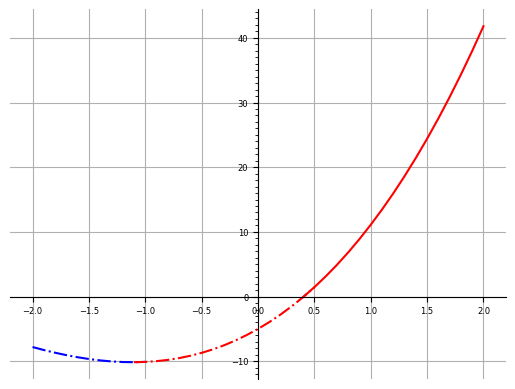

In [152]:
for i in range(len(x_keys) - 1):
    x_cur = np.arange(x_keys[i], x_keys[i+1] + step, step)
    if x_change.get(x_keys[i]) == 'zero':
        switch_line()
    else:
        switch_color()
    plt.rcParams['lines.linestyle'] = line_style
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.grid(True)
    plt.plot(x_cur, f(x_cur), color)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.spines.left.set_position('zero')
ax.spines.bottom.set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()